## Exercise 2

### Question 1

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
trade = pd.read_csv('trade.csv')

In [17]:
trade.head()

,Unnamed: 0,country1,country2,year,exports
0,1,United States of America,Haiti,1900,NaN
1,2,United States of America,Dominican Republic,1900,NaN
2,3,United States of America,Mexico,1900,17.08
3,4,United States of America,Guatemala,1900,NaN
4,5,United States of America,Honduras,1900,NaN


In [18]:
# fill na values wit zeros
trade.fillna(0,inplace=True)

In [19]:
trade['year'].unique()

array([1900, 1920, 1940, 1955, 1980, 2000, 2009])

In [20]:
# subset  the years of 1900, 1955 and 2009
year1900 = trade[trade['year'] == 1900]
year1955 = trade[trade['year'] == 1955]
year2009 = trade[trade['year'] == 2009]

In [21]:
# Create an adjecancy matrix from unique values of 'country1' column from the trade dataset. 
# Fill the values initally with zeros.

# assign unique values to 'countries' variable
countries = trade['country1'].unique()
# see the length
len(countries)

206

In [22]:
# create the matrix
matrix = np.zeros((206, 206))

# create the dataframe from the matrix with the column and index names
df = pd.DataFrame(matrix, columns=countries)
df['index'] = countries
df.set_index('index', inplace=True)

In [23]:
# assign this empty dataframe df to the years of 1900, 1955 and 2009
df_year1900 = df.copy() 
df_year1955 = df.copy()
df_year2009 = df.copy()

In [24]:
# modify the dataframe the for the year 1900 (commented lines are personal check to see if the assigment process works correctly)
# entry (i, j) equals 1 if country i exports to country j
for i in countries:
    for j in countries:
        if i != j:
            #print(i,j) 
            value = year1900[(year1900['country1'] == i) & (year1900['country2'] == j)]['exports'].values
            #print(value)
            #print(value>0)
            if len(value) != 0 and value > 0:
                df_year1900.loc[i,j] = 1
                #print('df_year1900', df_year1900.loc[i,j])  

df_year1900.head()

,United States of America,Haiti,Dominican Republic,Mexico,Guatemala,Honduras,El Salvador,Nicaragua,Colombia,Venezuela,...,Marshall Islands,Palau,Federated States of Micronesia,St. Vincent and the Gren,0,Democratic Republic of t,Hong Kong,East Timor,Federated States of Micr,Democratic Republic of the Con
index,,,,,,,,,,,,,,,,,,,,,
United States of America,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Haiti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dominican Republic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mexico,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guatemala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# This loop should be applied to all the years in the dataset. 
# But due to the comptutational power I have, I'm going to run this loop only for the years 1900, 1955 and 2009.

# year 1955
for i in countries:
    for j in countries:
        if i != j: 
            value = year1955[(year1955['country1'] == i) & (year1955['country2'] == j)]['exports'].values
            if len(value) != 0 and value > 0:
                df_year1955.loc[i,j] = 1
 
# year 2009
for i in countries:
    for j in countries:
        if i != j: 
            value = year2009[(year2009['country1'] == i) & (year2009['country2'] == j)]['exports'].values
            if len(value) != 0 and value > 0:
                df_year2009.loc[i,j] = 1

In [115]:
import igraph as ig

# initialize df_year2009 as an undirected network
year2009_g = ig.Graph.Adjacency(df_year2009.values.tolist(), mode='undirected')

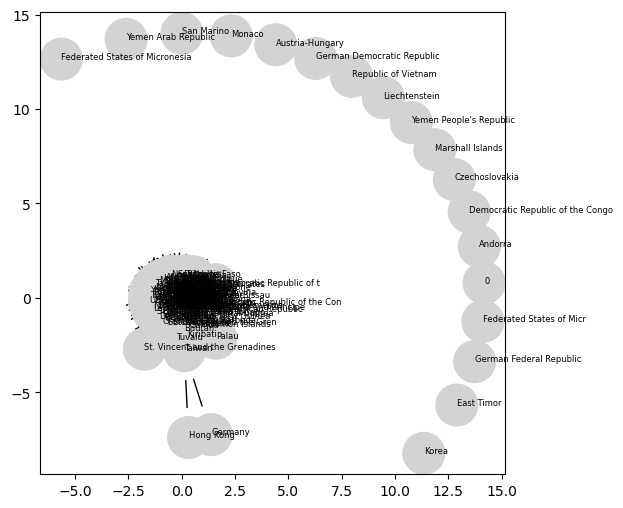

In [81]:
# plot the graph
fig, ax = plt.subplots(figsize=(6,6))

ig.plot(
    year2009_g,
    target=ax,
    vertex_size=30,
    vertex_label=df_year2009.index,
    vertex_label_size=6.0,
    vertex_color='lightgray'
)

In [82]:
pd.Series(year2009_g.density(), index=df_year2009.index).sort_values(ascending=False).head(5)

index
United States of America    0.522235
Madagascar                  0.522235
Somalia                     0.522235
Djibouti                    0.522235
Angola                      0.522235
dtype: float64

[Text(0.5, 1.0, 'Density')]

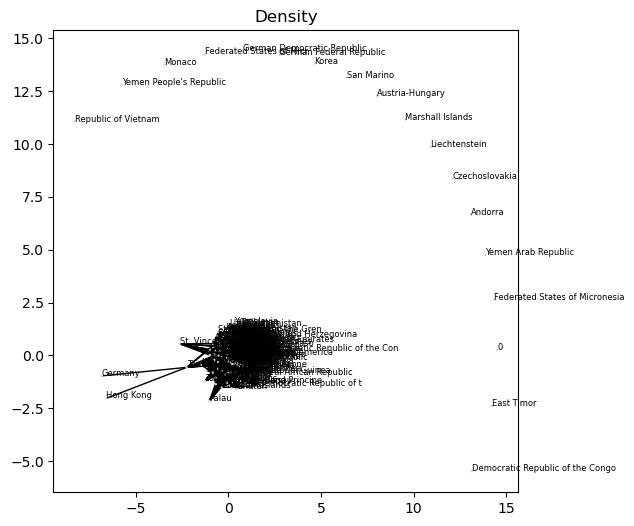

In [87]:
fig, ax = plt.subplots(figsize=(6,6))

ig.plot(
    year2009_g,
    target=ax,
    vertex_size=pd.Series(year2009_g.density(), index=df_year2009.index) * 1.5,
    vertex_label=df_year2009.index,
    vertex_label_size=6.0,
    vertex_color='lightgray'
)

ax.set(title='Density')

### Question 2

In [83]:
# year 1900

# based on degree
pd.Series(year2009_g.degree(), index=df_year2009.index).sort_values(ascending=False).head(5)

index
India             183
China             183
United Kingdom    182
Indonesia         182
Australia         182
dtype: int64

In [84]:
# based on betweenness
pd.Series(year2009_g.betweenness(), index=df_year2009.index).sort_values(ascending=False).head(5)

index
Taiwan                      371.000000
United States of America    168.585035
Canada                      157.022584
China                       154.327505
India                       154.327505
dtype: float64

In [85]:
# based on closeness
pd.Series(year2009_g.closeness(), index=df_year2009.index).sort_values(ascending=False).head(5)

index
India                       0.979058
China                       0.979058
United States of America    0.973958
United Kingdom              0.973958
Australia                   0.973958
dtype: float64

### Question 3

In [88]:
# initialize df_year2009 as a weighted, directed network
year2009directed_g = ig.Graph.Adjacency(df_year2009.values.tolist(), mode='directed')

In [110]:
# closeness for incoming path
pd.Series(year2009directed_g.closeness(mode='in', normalized=False), index=df_year2009.index).sort_values(ascending=False).head(5)

index
United Kingdom              0.005181
China                       0.005155
United States of America    0.005128
India                       0.005128
France                      0.005128
dtype: float64

In [112]:
# closeness for outcoming path
pd.Series(year2009directed_g.closeness(mode='out', normalized=False), index=df_year2009.index).sort_values(ascending=False).head(5)

index
China                       0.005236
India                       0.005236
United States of America    0.005208
France                      0.005208
Indonesia                   0.005208
dtype: float64

In [113]:
# directed betweenness
pd.Series(year2009directed_g.betweenness(directed=True), index=df_year2009.index).sort_values(ascending=False).head(5)

index
Taiwan                      742.015873
United States of America    521.245793
Canada                      485.605761
Japan                       473.517650
India                       462.691863
dtype: float64

In [114]:
# undirected betweenness
pd.Series(year2009directed_g.betweenness(directed=False), index=df_year2009.index).sort_values(ascending=False).head(5)

index
Taiwan                      371.000000
United States of America    221.213380
Canada                      205.286546
Japan                       200.104480
India                       196.254606
dtype: float64

In [106]:
# graph-strength
pd.Series(year2009directed_g.strength(), index=df_year2009.index).sort_values(ascending=False).head(5)

index
United Kingdom              363.0
China                       363.0
India                       362.0
United States of America    361.0
Japan                       361.0
dtype: float64

### Question 4

[Text(0.5, 1.0, 'Page Rank')]

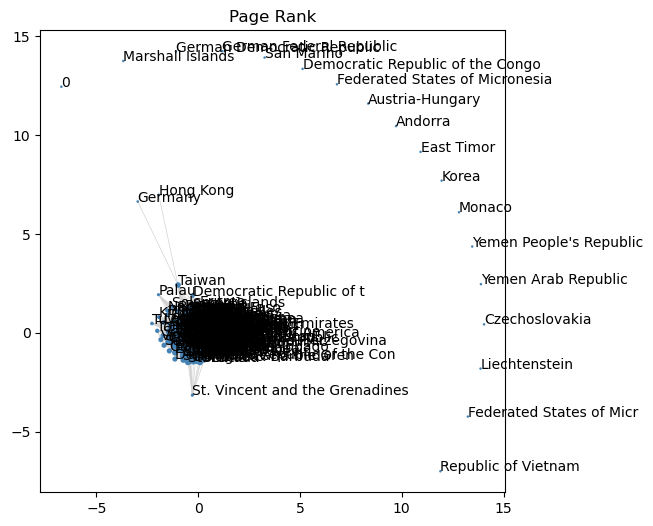

In [126]:
# PageRank
df_year2009['pagerank'] = year2009_g.pagerank()

fig, ax = plt.subplots(figsize=(6,6))

ig.plot(
    year2009_g,
    target=ax,
    vertex_size=df_year2009['pagerank'] * 1000,
    vertex_label=df_year2009.index,
    edge_color='lightgray',
    edge_width=0.5,
    edge_arrow_size=0.75,
)

ax.set(title='Page Rank')


In [124]:
# 5 most influential countries according to this algorithm
df_year2009['pagerank'].sort_values(ascending=False).head(5)

index
China                       0.008001
India                       0.008001
United States of America    0.007958
Japan                       0.007957
Australia                   0.007956
Name: pagerank, dtype: float64